In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

<hr>

__Import Datasets__

In [3]:
#data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
data1=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here the columns "*age - thall*" are the independent variables and the last column "*output*" contains the dependent variable.<br> The meaning of every column is given below (pulled from the original dataset description).

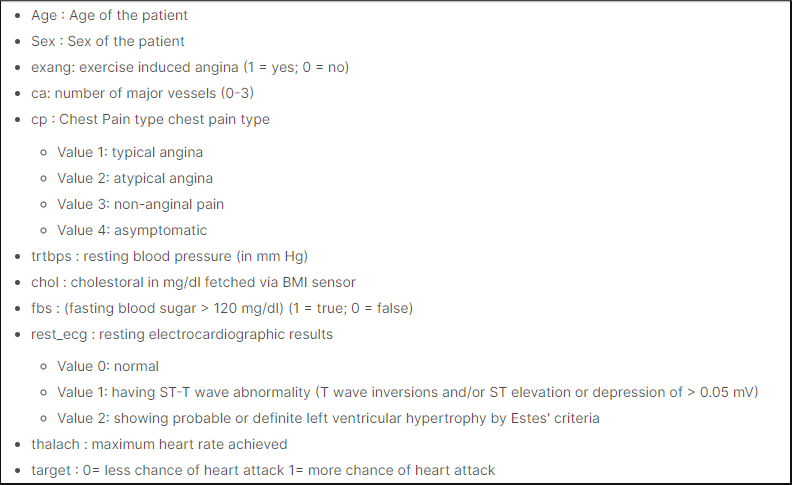

In [4]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

**Clealy, there are no null values in the dataset as observed above so we don't need to treat any columns for null values.**

<hr>

Let's observe the output variable for the data.

1    165
0    138
Name: output, dtype: int64


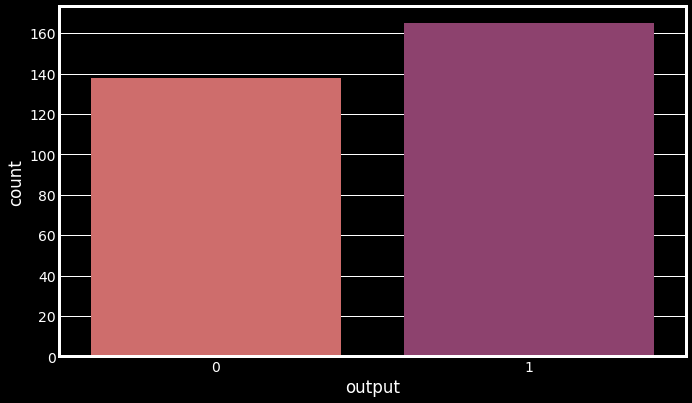

In [5]:
#Output variable
print(data1['output'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot("output", data=data1, palette='flare')
plt.show()

ax=px.pie(data1, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

"1" shows that the person is at a higher risk of experiencing an heart attack and similarly "0" shows a lower risk.<br>
So in the given dataset, more people are in the high risk (54.5%) and less people in the low risk (45.5%) as observed in the pie plot.

<hr>
As you must have noticed this dataset has 2 typical types of data, categorized data and continuous data. We cannot analyze this data together as categorization and continuous values have different properties. Let's first store these column names separately so that we can access them easily.<br><br>

In [6]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

<hr>

# Male vs Female
The dataset has a column "sex" to classify the patients in the category 1 or 0 based on their gender. However, it does not mention if 1 represents male or female and the same for 0. We can not bother and build the model anyway without knowing which label stands for which gender, but it's always better to know the gender for better analysis. <br><br>

Just by little research we can find this out^ ,

> __According to the Harvard Health department:__ <br>
> Researchers found that throughout life, men were about twice as likely as women to have a heart attack. That higher risk persisted even after they accounted for traditional risk factors for heart disease, including high cholesterol, high blood pressure, diabetes, body mass index, and physical activity. <br><br>

We can use this information to do find out which label stands for which gender. This basically means that the gender which has higher average risk of experiencing an heart-attack is more likely to be a male. We have the data to find this risk percentage, we only have to compute it as below.

In [7]:
#Divide the data based on sex variable
X=data1[data1["sex"]==1].reset_index()  
Y=data1[data1["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [8]:
ax= px.pie(data1, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
ax.show()

This pie chart depicts that more than 68% patients belong to one gender (male or female) while the rest to the other gender (31.7%) <br><br>
**We just have to find which one is which.  For that lets calculate the the percent of high risk for both labels (1 and 0)**

In [9]:
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("'1' average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
'1' average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


This shows that for the gender "1", 44.93% are at a high risk of having an heart attack whereas for gender "0", 75.0% are at a higher risk.<br>

> **Based on this calculation and the survey by harvard researchers, we can conclude that the sex label "0" in the dataset is for male whereas the label "1" is for females since the label "0" is more prone to having an heart attack (75.0%)**

Since we managed to find out which label stood for which gender, we can now visualize the data for Male vs Female.

Female Value Counts: 
0    114
1     93
Name: output, dtype: int64
Male Value Counts: 
1    72
0    24
Name: output, dtype: int64


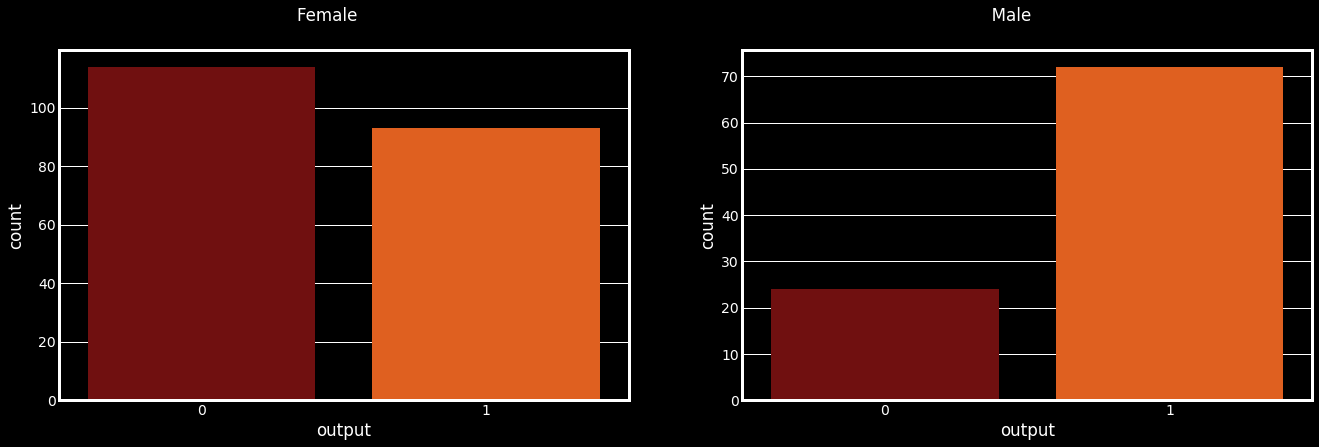

In [10]:
print("Female Value Counts: \n{}".format(X['output'].value_counts()))
print("Male Value Counts: \n{}".format(Y['output'].value_counts()))

fig, ax1 = plt.subplots(1,2, figsize=(20,6))
plt.suptitle("Female                                                                                                                      Male")
sns.countplot("output", data=X, palette='gist_heat',ax=ax1[0])
sns.countplot("output", data=Y, palette='gist_heat',ax=ax1[1])
fig.show()

> Below is a box-cum-swarm plot for the two genders. It is a great way to observe the data and it's stats like **median, max, min, and the quartiles** by just hovering on the plots.

As we can see more females took part in the research as compared to males and also the range of women was higher (29-77 years) as opposed to (34-76 years) in men.

In [11]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

**The sunburst plots from Plotly show more specific visualizations. They visualize hierarchical data spanning outwards radially from root to leaves. The sunburst sector hierarchy is determined by the entries in labels ( names in px. sunburst ) and in parents . The root starts from the center and children are added to the outer rings.**<br>
> In this case, the parent column is "Sex".

In [12]:
class_cols=["output",'cp',"fbs","exng","restecg","thall","caa","slp"]
for col in class_cols:
    ax= px.sunburst(data1, names= col,path= ["sex",col],template= "plotly_dark", title= "{} => Based on Sex".format(col))
    ax.show()

<hr>

Now let's plot the categorized values, namely **["output",'cp',"fbs","exng","restecg","thall","caa","slp"]**

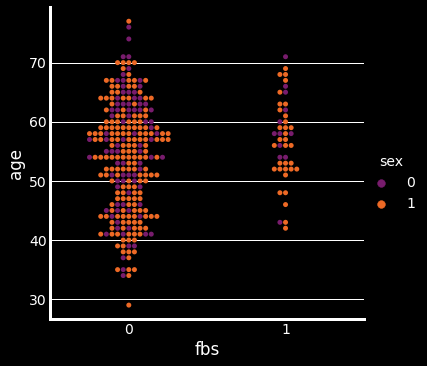

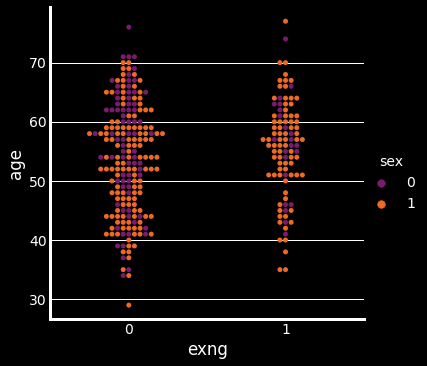

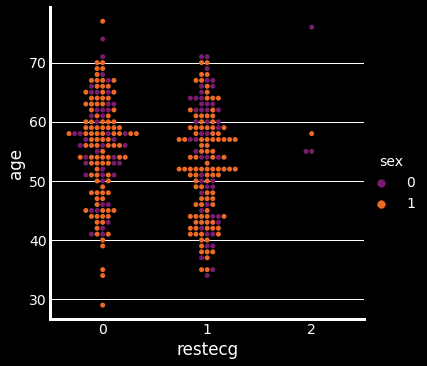

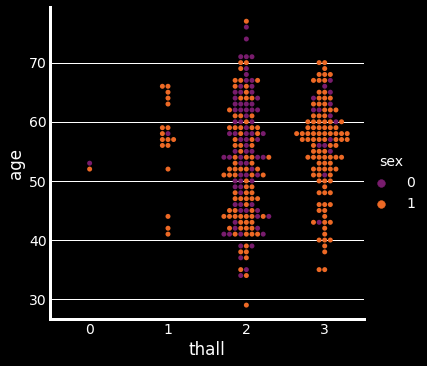

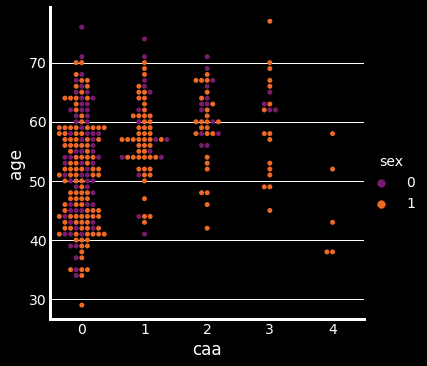

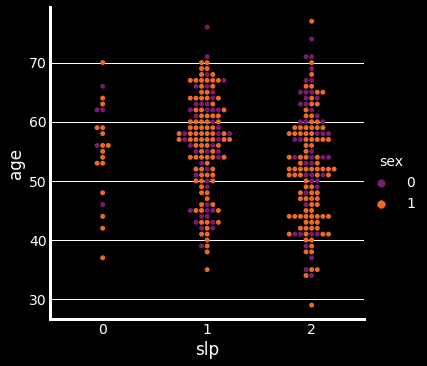

In [13]:
#Pie plots 
for col in class_cols[2:]:
    ax=px.pie(data1, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
    
#Swarm Plots
for col in class_cols[2:]:
    sns.catplot(kind="swarm", data=data1, x=col, y="age", palette="inferno", hue="sex")
plt.show()
    
# fig, ax1 = plt.subplots(4,2, figsize=(15,22.5))
# k = 0
# for i in range(4):
#     for j in range(2):
#         sns.boxplot(data=data1,x=class_cols[k],y="age",palette="autumn",hue="sex",saturation=1,ax=ax1[i][j])
#         k+=1
# plt.tight_layout()
# plt.show()

<hr>

Plotting the pie charts and swarm plots for the continuous variables will not get us anywhere, so instead we plot the density distribution for these variables and analyze them. **["age","trtbps","chol","thalachh","oldpeak"]**

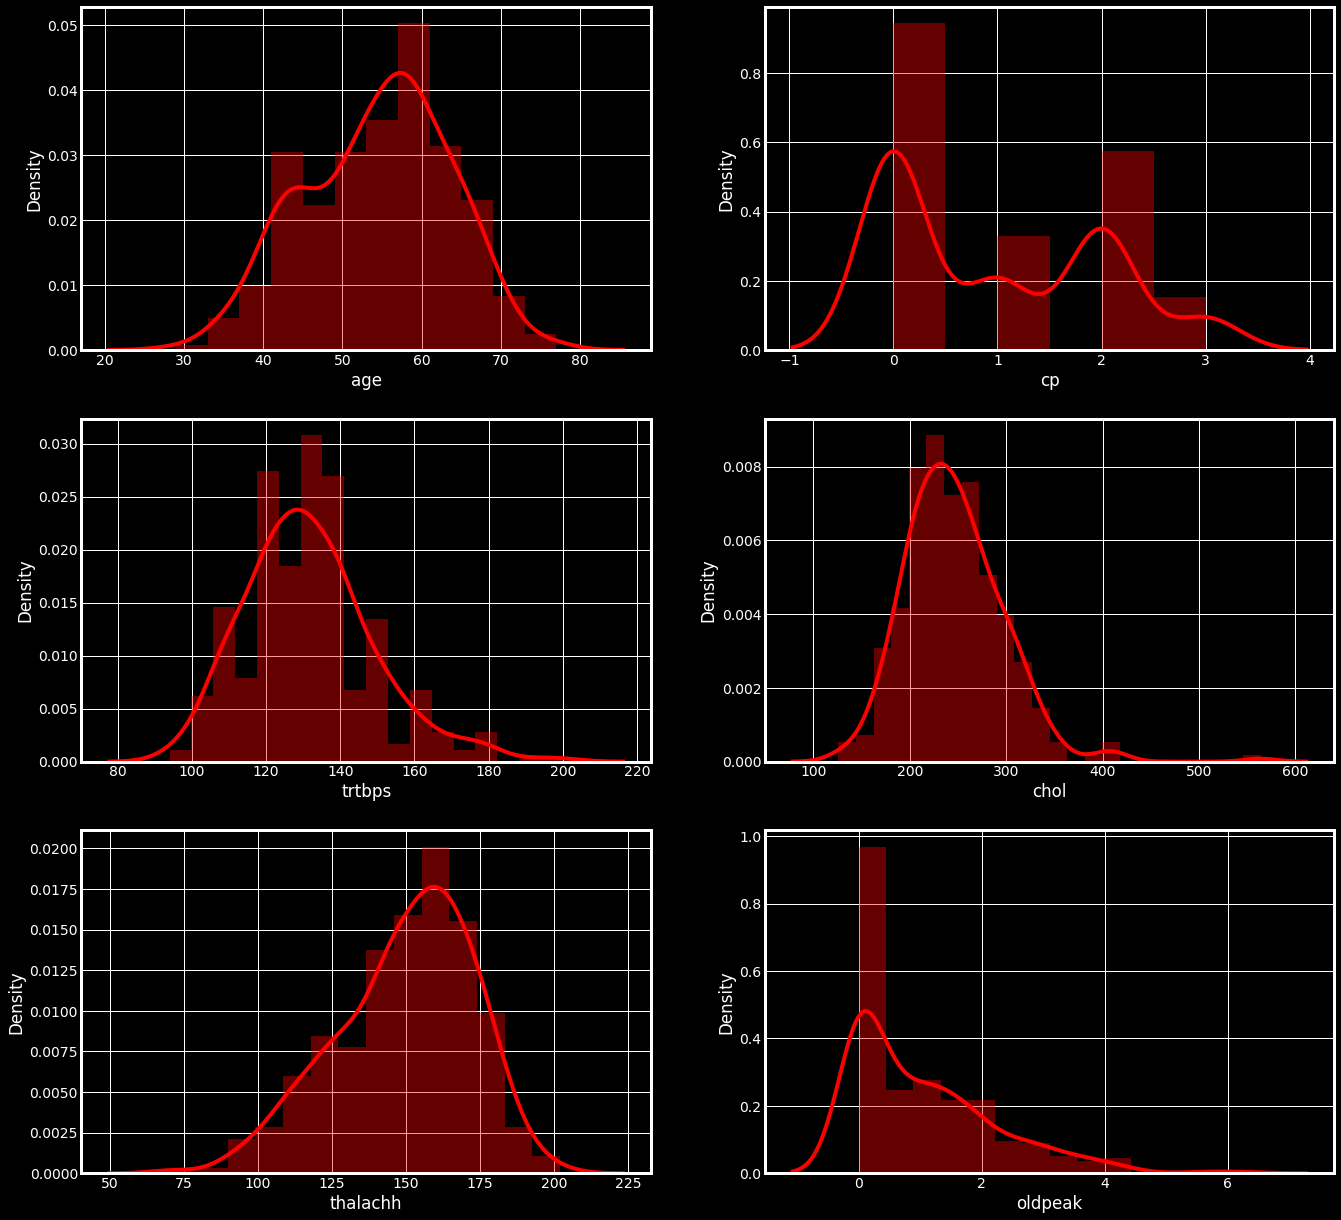

In [14]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

These plots look okay to as none of them except "oldpeak" are skewed too much to the left or right. We will take care of these columns later while pre-processing the data.<br><br>
<hr>

# "Age" EDA
Let's analyze the age column more closely now. We will plot the variation of age with respect to other variables like "sex" and "output".

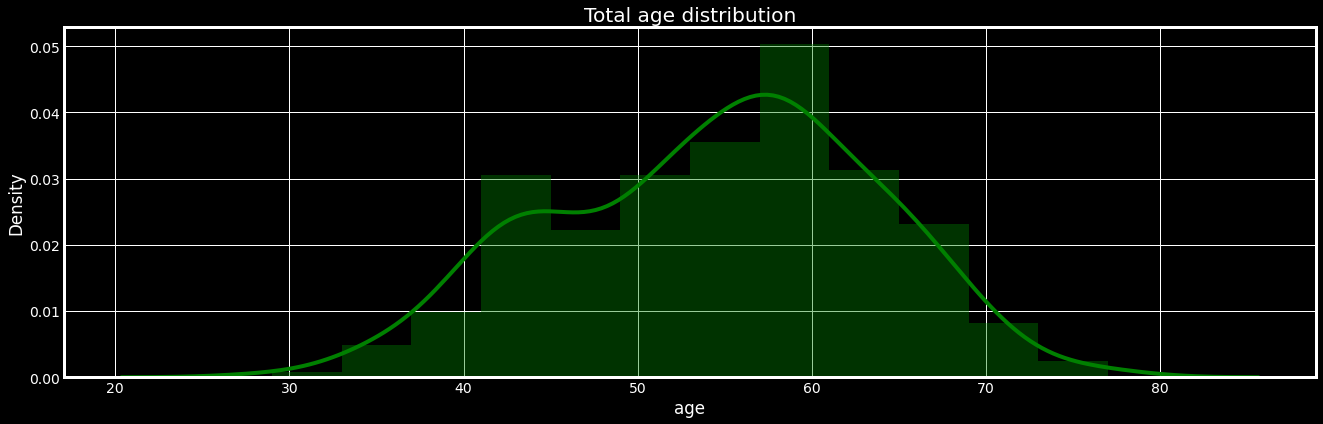

In [15]:
#Distribution plots
plt.figure(figsize=(20,6))
sns.distplot(data1["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(data1,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()

**Plot 1: The first plot shows the total distribution of age for all the individuals in the survey. Most of them were between 50-60 age group and very few on either side.<br>
Plot 2: The second plot shows the distribution of age separately for people with higher risk (output = 1) and for peoplw with lower risk (output = 0)<br>
Plot 3: the third plot shows the distribution of age separately for women (sex = 1) and men (sex = 0)<br>**

In [16]:
X=data1[data1["sex"]==1].reset_index()  #Females
Y=data1[data1["sex"]==0].reset_index()   #Males

HR=data1[data1["output"]==1].reset_index()  #High Risk
LR=data1[data1["output"]==0].reset_index()  #Low Risk

#Calculate general characteristics
print("----------------General Data------------------")
print("Total Age =>")
print("Mean: {}".format(round(data1["age"].mean())))
print("Median: {}".format(round(data1["age"].median())))
print("Variance: {}".format(round(data1["age"].var())))
print("Standard Deviation: {}\n".format(round((data1["age"].std()),3)))

# Calculate gender specific characteristics
print("--------------Gender Specific Data-------------------")
print("For MEN =>")
print("Mean: {}".format(round(Y["age"].mean())))
print("Median: {}".format(round(Y["age"].median())))
print("Variance: {}".format(round(Y["age"].var())))
print("Standard Deviation: {}\n\n".format(round((Y["age"].std()),3)))

print("For WOMEN =>")
print("Mean: {}".format(round(X["age"].mean())))
print("Median: {}".format(round(X["age"].median())))
print("Variance: {}".format(round(X["age"].var())))
print("Standard Deviation: {}\n".format(round((X["age"].std()),3)))

# Calculate output specific characteristics
print("------------------Output Specific Data-----------------------")
print("For High Risk =>")
print("Mean: {}".format(round(HR["age"].mean())))
print("Median: {}".format(round(HR["age"].median())))
print("Variance: {}".format(round(HR["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HR["age"].std()),3)))

print("For Low Risk =>")
print("Mean: {}".format(round(LR["age"].mean())))
print("Median: {}".format(round(LR["age"].median())))
print("Variance: {}".format(round(LR["age"].var())))
print("Standard Deviation: {}".format(round((LR["age"].std()),3)))

----------------General Data------------------
Total Age =>
Mean: 54
Median: 55
Variance: 82
Standard Deviation: 9.082

--------------Gender Specific Data-------------------
For MEN =>
Mean: 56
Median: 57
Variance: 89
Standard Deviation: 9.409


For WOMEN =>
Mean: 54
Median: 54
Variance: 79
Standard Deviation: 8.884

------------------Output Specific Data-----------------------
For High Risk =>
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


For Low Risk =>
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


<hr>

# Data Pre-processing
We will start off by observing the correalation between every column and the specific correlation with the output.

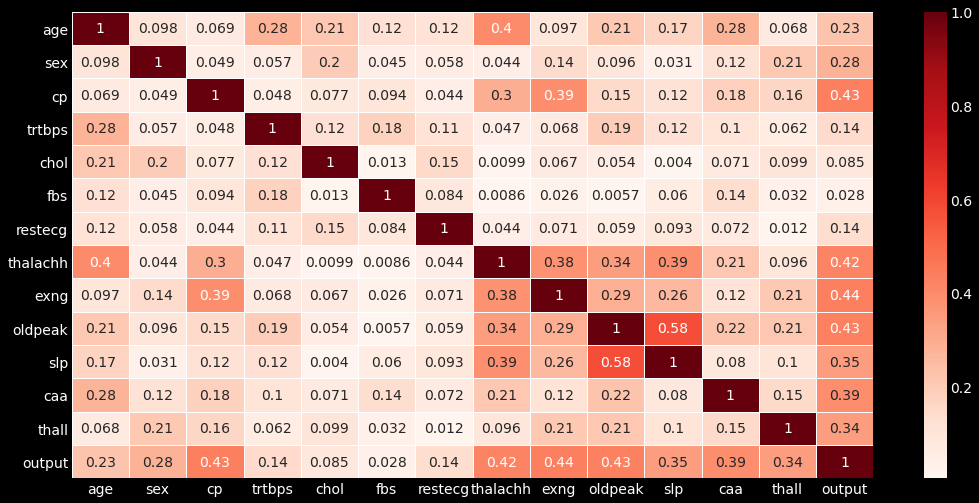

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


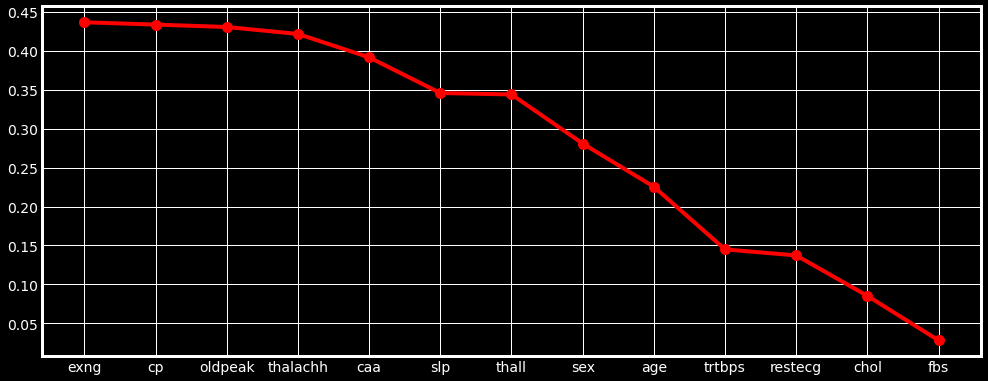

In [17]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

We can see that no column is highly correlated with the output, with a maximum correlation of **0.436757** for "exng" and a minimum correlation of **0.028046** for "fbs". Anyway, we will go ahead and use them all for our model.

**Next, we have to check the data for outliners and treat them.**<br>
We will use the IQR (Inter-Quartile Range) method to detect outliners and then visualize them with the help of boxplots.

In [18]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


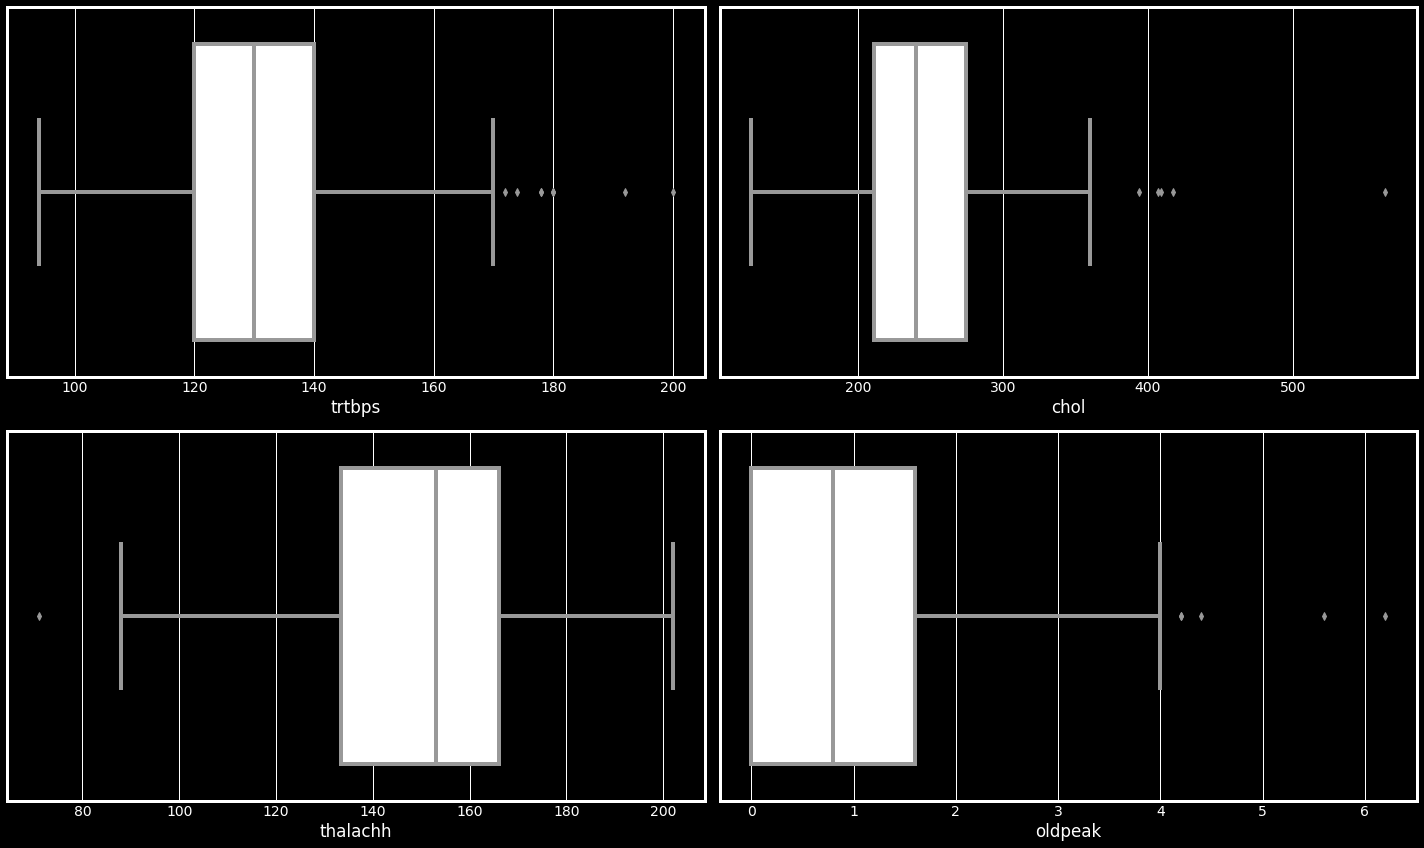

Outliners Present at position: 

trtbps: (array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),)
chol: (array([ 28,  85,  96, 220, 246]),)
thalachh: (array([272]),)
oldpeak: (array([101, 204, 221, 250, 291]),)


In [19]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data1,x=data1[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data1['trtbps']>165)))
print("chol: {}".format(np.where(data1['chol']>360)))
print("thalachh: {}".format(np.where(data1['thalachh']<80)))
print("oldpeak: {}".format(np.where(data1['oldpeak']>4)))

Clearly, there arent many outliners but we still have to try to minimize them as much as we can. We can take the log of these columns to bring all values within a range and minimize the outliners.

In [20]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trtbps"]= np.log(data1.trtbps)
data1["chol"]= np.log(data1.chol)
data1["thalachh"]= np.log(data1.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


**After performing the log transform a significant number of outliners was reduced as observed above.**

That's all the preprocessing we need, we will now build our models.<br>

<hr>

**Data Splitting and scaling:**<br>
We will split the data into training and testing sets using train_test_split from *sklearn.preprocessing*. After splitting we will scale our data using the MinMax scaler before using it for training our model.

In [21]:
#Data Splitting
X=data1.iloc[:,:13]
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

<hr>

**Display Function to plot and compute the data.**<br>
We will use this function for each model separately.

In [22]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

<hr>

# 1 => Logistic Regression

Execution time of model: 0.0105 seconds



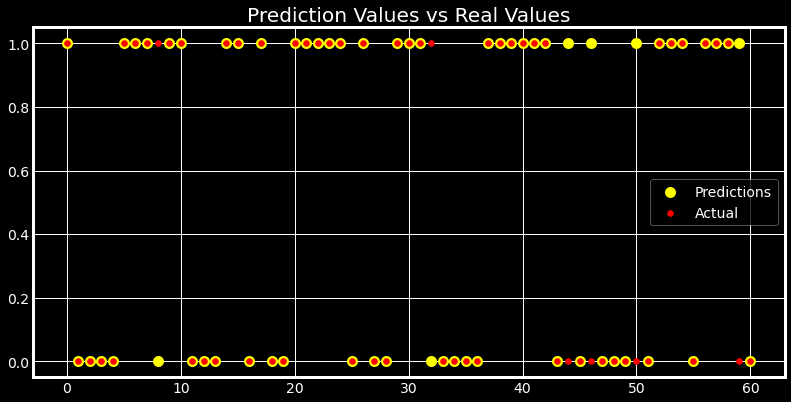

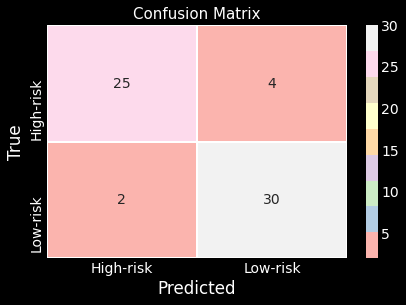

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [23]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

# 2 => K-Nearest Neighbours

Execution time of model: 0.00577 seconds


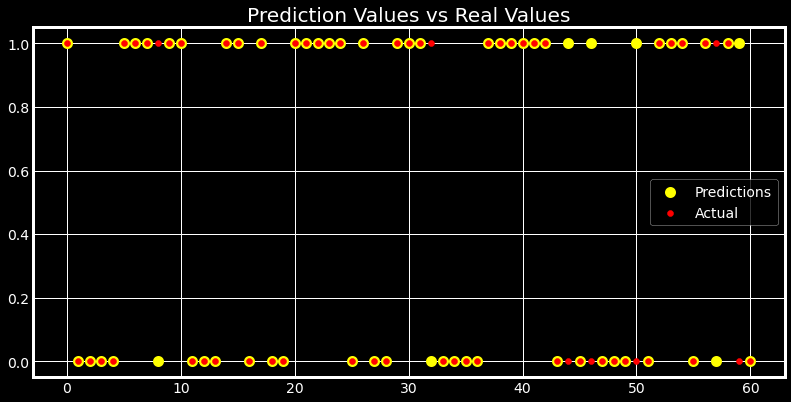

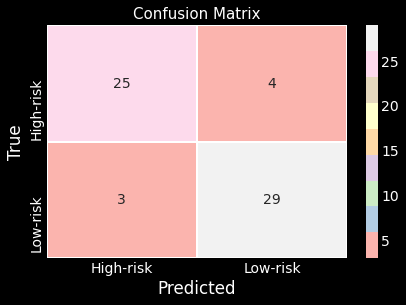

Precision: 0.879 
Recall: 0.906 
F1-Score: 0.892 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [24]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 3 => Support Vector Machines

Execution time of model: 0.00547 seconds


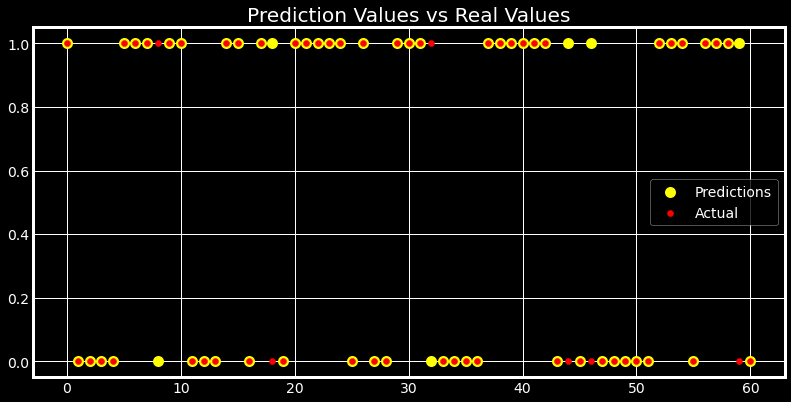

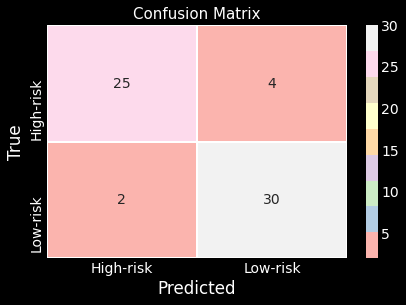

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [25]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 4 => Decision Tree Classifier

Execution time of model: 0.00293 seconds


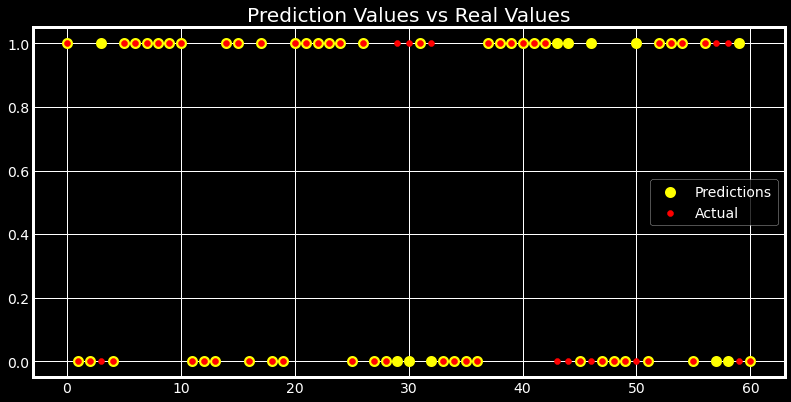

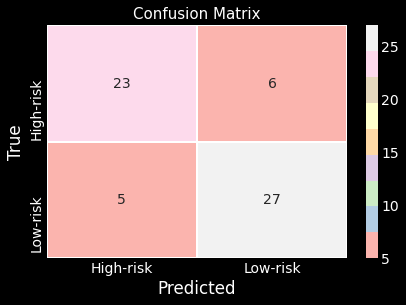

Precision: 0.818 
Recall: 0.844 
F1-Score: 0.831 
Accuracy: 81.967 %
Mean Square Error: 0.18


In [26]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 5 => Random Forest Classifier

Execution time of model: 0.5838 seconds


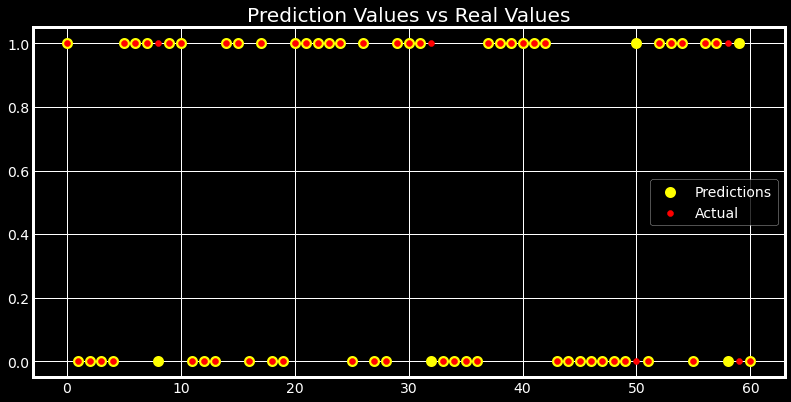

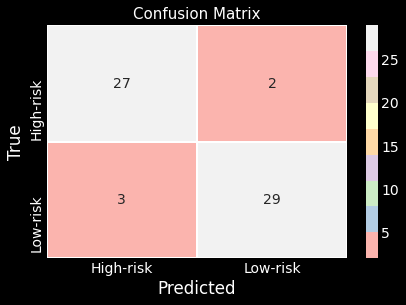

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [27]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 6 => AdaBoost Classifier

Execution time of model: 0.04885 seconds


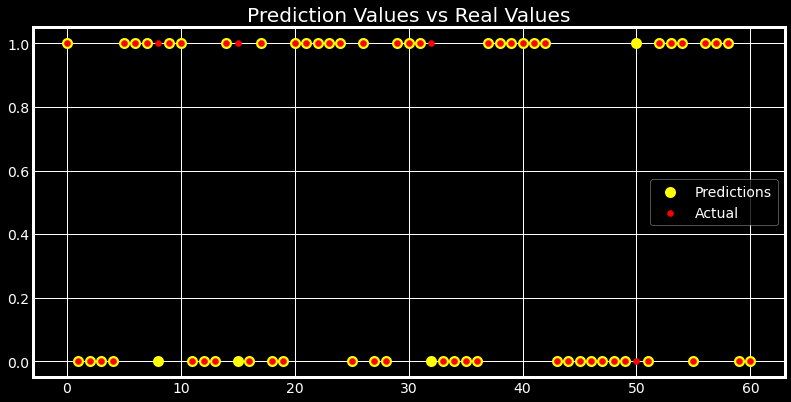

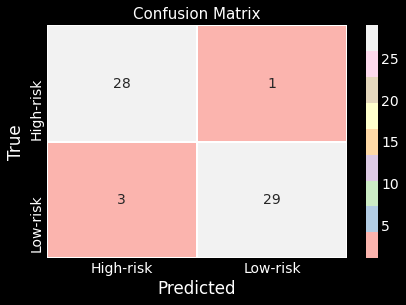

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [28]:
#Build Model
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 7 => Gradient Boosting Classifier

Execution time of model: 0.02179 seconds


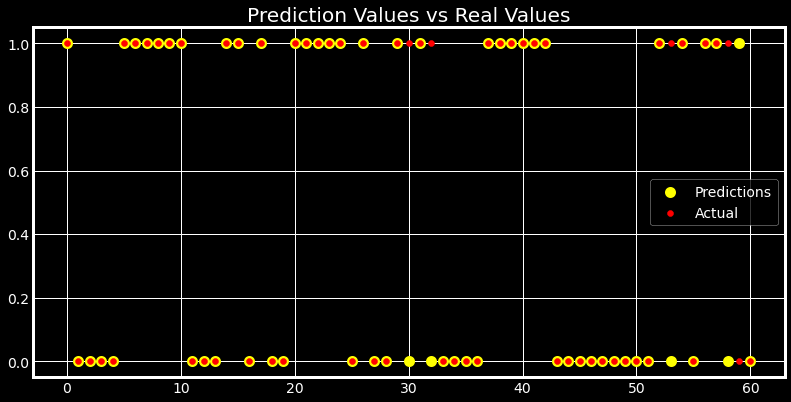

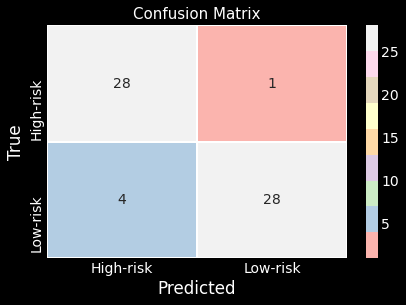

Precision: 0.966 
Recall: 0.875 
F1-Score: 0.918 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [29]:
#Build Model
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 8 => XGBoost Classifier

[22:07:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time of model: 0.04069 seconds


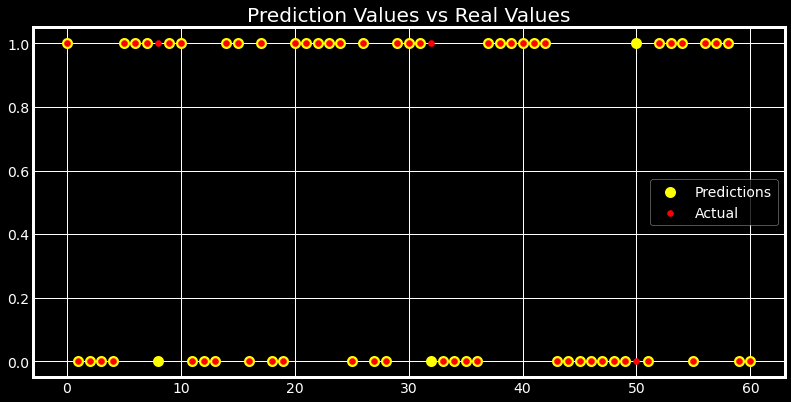

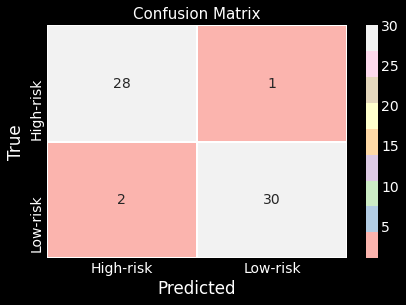

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [30]:
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 9 => MLPClassifier

Execution time of model: 0.95687 seconds


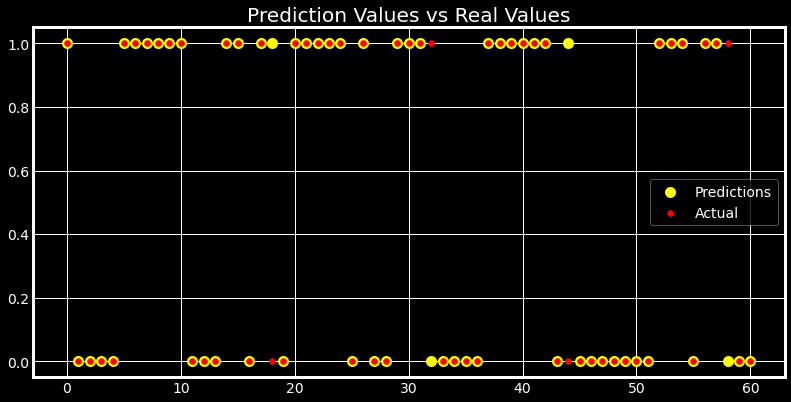

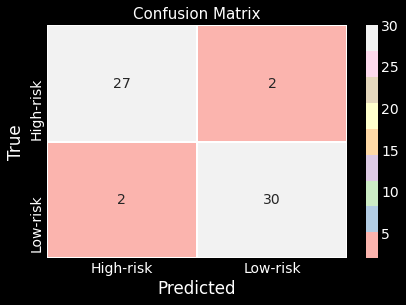

Precision: 0.938 
Recall: 0.938 
F1-Score: 0.938 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [31]:
#Build Model
start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=150,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<hr>

> The best parameters and random state for every model was calculated using the following **checkRS()** function.

RMSE is lowest at 0.049 for n: [100, 125, 150, 175] 


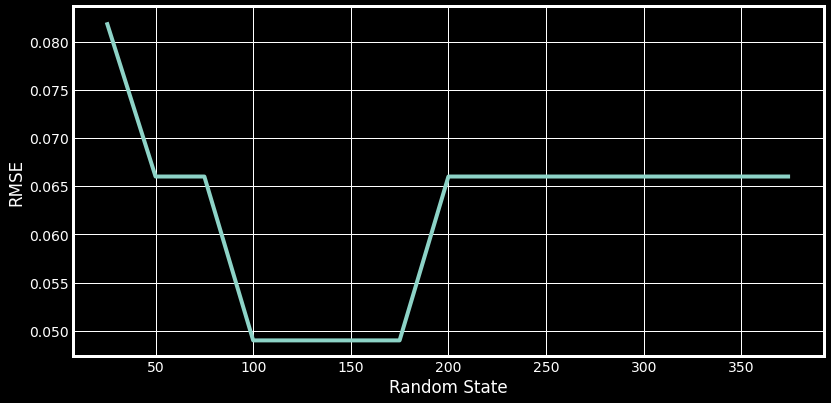

Accuracy is highest at 95.082 % for n: [100, 125, 150, 175] 


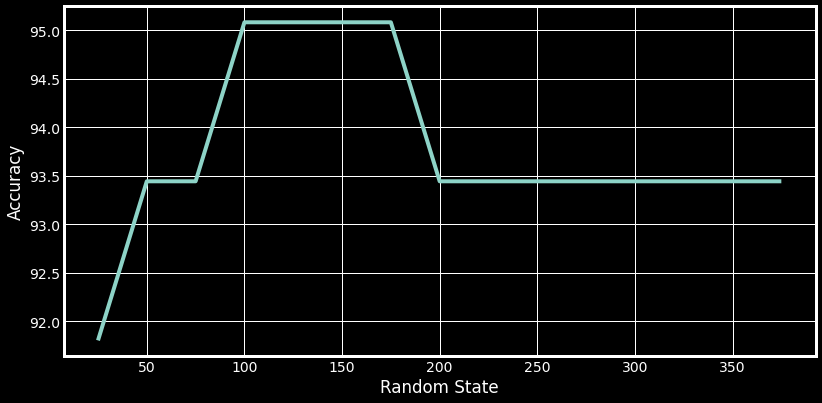

In [32]:
def checkRS():

    mse_dict={}  #Root mean square dictionary
    acc_dict={}  #Accuracy dictionary

    for n in range(25,400,25):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=65)
        model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=n,activation = 'relu',solver='adam')
        model_MLP.fit(X_train, Y_train)
        Y_pred=model_MLP.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred)
        mse=mean_squared_error(Y_test,Y_pred)
        mse_dict.update({n:round(mse,3)})
        acc_dict.update({n:round((acc*100),3)})

    #Mean Square Error
    lowest=min(mse_dict.values())
    res = [key for key in mse_dict if mse_dict[key] == lowest]
    mse_list=mse_dict.items()
    k,v = zip(*mse_list) 
    print("RMSE is lowest at {} for n: {} ".format(round((lowest),3),res))

    #Plot RMSE values
    plt.figure(figsize=(12,6))
    #plt.scatter(res,lowest,color="red",lw=5)
    plt.plot(k,v)
    plt.xlabel("Random State")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.show()

    #Accuracy
    highest=max(acc_dict.values())
    res1= [key for key in acc_dict if acc_dict[key] == highest]
    acc_list=acc_dict.items()
    k1,v1=zip(*acc_list)
    print("Accuracy is highest at {} % for n: {} ".format(highest,res1))
    #Plot Accuracy values
    plt.figure(figsize=(12,6))
    #plt.scatter(res1,highest,color="red",lw=5)
    plt.plot(k1,v1)
    plt.xlabel("Random State")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
    
checkRS()

<hr>

# Compare Accuracy and Execution Time

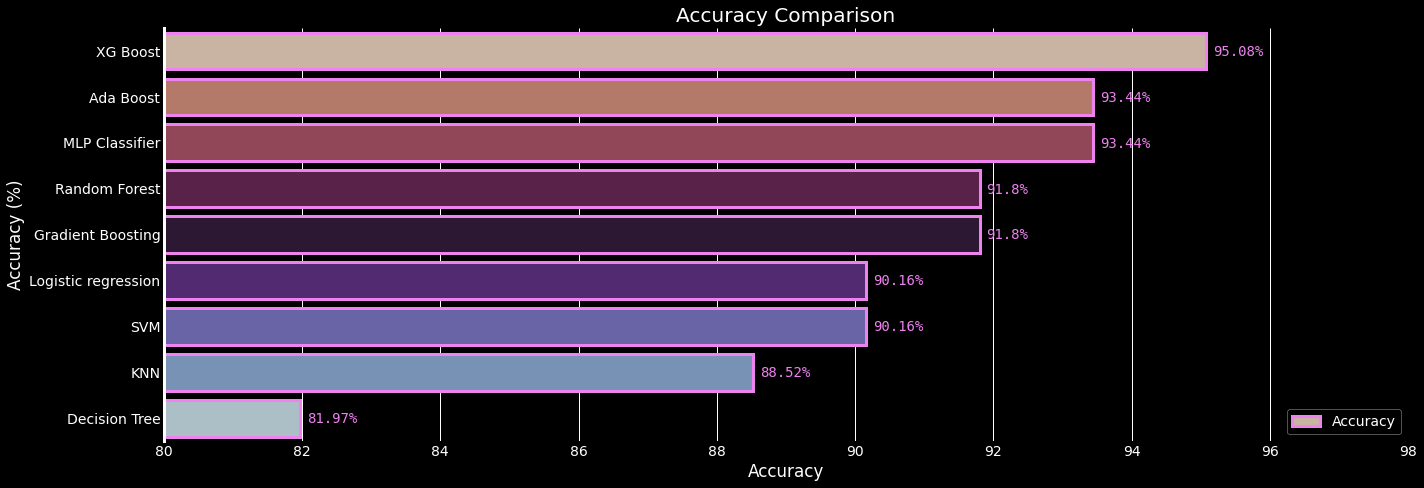

In [33]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

So clearly, the boosting algorithms have dominated the accuracy when it comes to the model comparison (Unsurprisingly). <br>
* XGBoost: 95.08%
* AdaBoost: 93.44%
* MLPClassifier: 93.44%
* Random Forest: 91.8%
* Gradient Boosting: 91.8%
* Logistic Regression: 90.16%
* SVM: 90.16%
* KNN: 88.52%
* Decision Tree: 81.97%

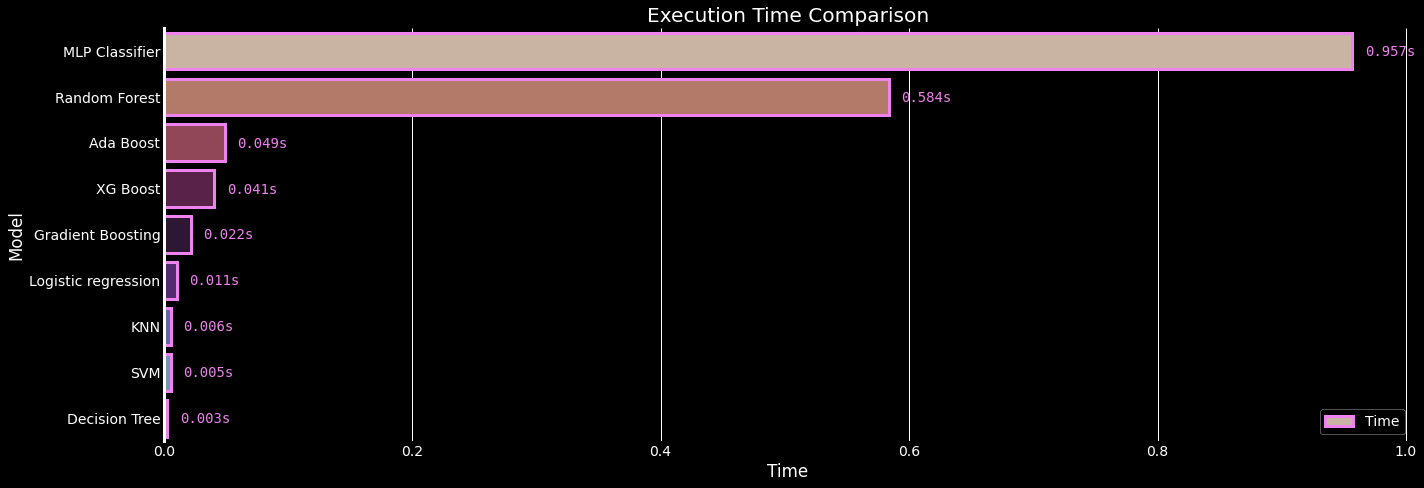

In [34]:
exe_time={"Logistic regression": model_Log_time,
            "KNN": model_KNN_time,
            "SVM": model_svm_time,
            "Decision Tree": model_tree_time,
            "Random Forest": model_RF_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time,
            "MLP Classifier": model_MLP_time }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

When it comes to the execution time, decision tree is again at the bottom (which is a good thing this time) and is the fastest algorithm of the lot.
* MLPClassifier: 1.211s
* Random Forest: 0.59s
* AdaBoost: 0.051s
* XGBoost: 0.044s
* Gradient Boosting: 0.025s
* Logistic Regression: 0.011s
* SVM: 0.009s
* KNN: 0.008s
* Decision Tree: 0.003s


<hr><hr>

# __Conclusion:__

1. We started off by understanding the columns of the Heart Attack dataset and performing EDA on the it.
2. The dataset didn't mention which label (0 or 1) stood for which gender, hence we also found that  with a little extra research.
3. We then preprocessed the data based on the correlation and outliners.
4. The preprocessed data was used to train 9 ML models who's accuracy and execution time was stored and later plotted to compare the models.

<hr>

**If you found the notebook useful please upvote!**<br>
**If you have any doubts or suggestions, feel free to comment down below!**

# Thank You!!

<hr><hr>